### **State University of Campinas - UNICAMP** </br>
**Course**: MC886A </br>
**Professor**: Marcelo da Silva Reis </br>
**TA (PED)**: Marcos Vinicius Souza Freire

---

**Student 1**: Felipe Camilo de Queiroz



**Student 2**: Danilo Sucomine Carreira



---

### **Assignment 4: MC886A**
#### **Transfer Learning with Transformers for Text Classification**
##### Notebook: mc886_1s2025-assignment_4.ipynb

---

### **Building on Previous Knowledge**
In our last hands-on, we dealt with **sentiment analysis** using the IMDB movie review dataset - a **binary classification** task where you predicted positive or negative sentiment. You learned the fundamentals of text preprocessing, neural networks, and basic classification techniques.

Now, we're taking a significant step forward! 🚀

## **Objective**

Explore **Transfer Learning** with **Transformers** through a hands-on implementation of multi-class text classification. This assignment focuses on understanding transformer architectures, attention mechanisms, and advanced fine-tuning techniques using PyTorch and [Hugging Face Transformers](https://huggingface.co/). Get a look at: [Transformers](https://huggingface.co/docs/transformers/en/index)

## **Dataset: AG News Classification**

You'll work with the **AG News Dataset** - a multi-class news categorization task with 4 classes:
- **World** (0): World news
- **Sports** (1): Sports news  
- **Business** (2): Business news
- **Technology** (3): Science and technology news

This dataset contains 120,000 training samples and 7,600 test samples, providing a challenging and realistic NLP scenario.

### **Dataset Examples**

**World News:**
> "Ukraine's President Calls for Calm After Opposition Protests. Ukraine's president urged calm and dialogue after thousands of opposition supporters rallied in Kiev to protest alleged election fraud."

**Sports:**  
> "Lakers Defeat Celtics in Overtime Thriller. LeBron James scored 35 points as the Los Angeles Lakers defeated the Boston Celtics 118-115 in a thrilling overtime game."

**Business:**
> "Tesla Stock Surges on Record Quarterly Deliveries. Tesla shares jumped 8% in pre-market trading after the electric vehicle maker reported record quarterly deliveries exceeding analyst expectations."

**Science/Technology:**
> "New AI Model Achieves Human-Level Performance on Reading Comprehension. Researchers unveiled a transformer-based model that matches human performance on complex reading comprehension tasks."

---

### **The Challenge**
You need to categorize news articles into the correct topic area - just like how news websites organize their content!

**What you're building:**
- **Input**: A news article (title + description)
- **Output**: Predicted category (World, Sports, Business, or Science/Technology)
- **Real-world application**: Automated content organization, news recommendation systems, media monitoring

### **Example Classification**

Let's see what your model will learn to do:

**Input Article:** *"Apple Reports Record iPhone Sales in Q4. Apple Inc. announced today that iPhone sales reached an all-time high in the fourth quarter, driven by strong demand for the new iPhone 15 series across global markets."*

**Your Model's Job:**
- ❌ World (politics/international affairs)
- ❌ Sports (games/athletics)  
- ✅ **Business** (companies/markets/economy)
- ❌ Science/Tech (research/innovation)

**Why Business?** Keywords like "sales," "quarter," "demand," "markets" indicate business/financial news rather than pure technology.

---

## **IMPORTANT: Dataset Exploration and Visualization Requirements**

As part of your assignment evaluation, you **MUST**:

1. **Explore the dataset thoroughly** - Analyze class distributions, text lengths, vocabulary statistics
2. **Create meaningful visualizations** - This includes but is not limited to:
   - Class distribution bar charts
   - Text length histograms
   - Sample text examples from each category
3. **Implement the models** - All implementations asked in the following four sections
4. **Document your findings** - Explain what you observe about the dataset characteristics

**This exploration and visualization component will be part of your grading criteria.**

---

## **Section 1: Dataset Loading and Preprocessing**

### **Learning Objectives**
- Understand multi-class text classification datasets using Transformers
- Implement proper data splitting and preprocessing
- Create custom PyTorch datasets for transformer models

### **Implementation Task**

You need to complete the dataset loading and preprocessing pipeline. The **AG News dataset** requires special handling for multi-class labels.

In [ ]:
# Required installations
!pip install torchmetrics

# Basic imports (add missing imports as needed)
import os
import random
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm
from collections import Counter, defaultdict
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from torchmetrics.classification import Accuracy, MulticlassPrecision, MulticlassRecall, MulticlassF1Score

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    get_linear_schedule_with_warmup,
    AutoConfig
)

# Set random seeds for reproducibility
# TODO: Implement seed setting for random, numpy, and torch
seed = 42

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Model Parameters
params = {
    'model_name': "distilbert-base-uncased",
    'num_classes': 4,
    'batch_size': 32,
    'learning_rate': 2e-5,
    'weight_decay': 0.01,
    'max_length': 128,
    'epochs': 3,
    'warmup_steps': 500,
}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### ***HINT: Dataset Loading***

In [ ]:
# TODO: Load the CSV files
# Remember to:
# 1. Skip the header row (skiprows=1)
# 2. Assign proper column names: ['label', 'title', 'description']
# 3. Convert labels from 1-based to 0-based indexing
# 4. Create 'full_text' by combining title and description
# 5. Split training data into train/validation (90/10 split)

train_df = pd.read_csv("/content/drive/MyDrive/MC886/lab04/data/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/MC886/lab04/data/test.csv")

#renaming columns
train_df.columns = ['label', 'title', 'description']
test_df.columns = ['label', 'title', 'description']

#relabel data
train_df['label'] = train_df['label'] - 1
test_df['label'] = test_df['label'] - 1

#create full text
train_df['full_text'] = train_df['title'] + ' ' + train_df['description']
test_df['full_text'] = test_df['title'] + ' ' + test_df['description']

#drop old columns
test_df = test_df.drop(['title', 'description'], axis=1)
train_df = train_df.drop(['title', 'description'], axis=1)

train_df['full_text'] = train_df['full_text'].apply(lambda x: x.replace('#39;', "'"))
test_df['full_text'] = test_df['full_text'].apply(lambda x: x.replace('#39;', "'"))

#creating validation set
validation_df = train_df.sample(frac=0.1, random_state=42) #colocar seed depois
train_df = train_df.drop(validation_df.index)

### **Exploratory Data Analysis**




In [ ]:
class_dict = {0:"World", 1:"Sports", 2:"Business", 3:"Technology"}

def get_token_counts(df):
  token_counter = Counter()
  for text in df['full_text']:
    tokens = re.findall(r'\b\w+\b', text.lower())
    token_counter.update(tokens)
  return token_counter

#the most common words are my vocab
def get_vocab(token_counter, limit):
  vocab = {'<pad>': 0, '<unk>': 1}
  for idx, (token, count) in enumerate(token_counter.most_common(limit - 2), start=2):
    vocab[token] = idx
  return vocab

limit = 10000
token_counter = get_token_counts(train_df)
vocab = get_vocab(token_counter, limit)

#get most common words and their frequencies
most_common = token_counter.most_common(50)
words = [word for word, _ in most_common]
frequencies = [count for _, count in most_common]

fig = px.bar(train_df["label"].value_counts()/ train_df.shape[0], title="Class Distribution")
fig.update_layout(xaxis_title="Class", yaxis_title="Proportion")
fig.show()

fig = px.bar(x=words, y=frequencies, title="Most Common Words")
fig.update_layout(xaxis_title="Word", yaxis_title="Frequency")
fig.show()

print("Tamanho do vocabuário:" , len(token_counter))

print("Exemplo de cada classe:\n")

for i in range(0,4):
  print(class_dict[i],": ", train_df[train_df['label'] == i].iloc[0]["full_text"])


Tamanho do vocabuário: 62614
Exemplo de cada classe:

World :  Venezuelans Vote Early in Referendum on Chavez Rule (Reuters) Reuters - Venezuelans turned out early\and in large numbers on Sunday to vote in a historic referendum\that will either remove left-wing President Hugo Chavez from\office or give him a new mandate to govern for the next two\years.
Sports :  Phelps, Thorpe Advance in 200 Freestyle (AP) AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American team for the evening's 400 freestyle relay final. Phelps' rivals Ian Thorpe and Pieter van den Hoogenband and teammate Klete Keller were faster than the teenager in the 200 free preliminaries.
Business :  Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its b

### **Custom Dataset Class Implementation (just an example)**

In [ ]:
#defining pytorch dataset
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        # TODO: Return dataset size
        return(len(self.texts))

    def __getitem__(self, idx):
        # TODO: Implement tokenization and return proper format
        text = self.texts.iloc[idx]
        tokens = re.findall(r'\b\w+\b', text.lower())

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels.iloc[idx], dtype=torch.long)
        }

## **Section 2: Model Architecture and Embedding Visualization**

### **Learning Objectives**
- Load and analyze pre-trained transformer models
- Visualize transformer embeddings before fine-tuning
- Understand how different layers capture different features

### **Implementation Task**

Load the pre-trained model and implement embedding extraction and visualization.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/tmp/ipython-input-6-3520241594.py:51: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



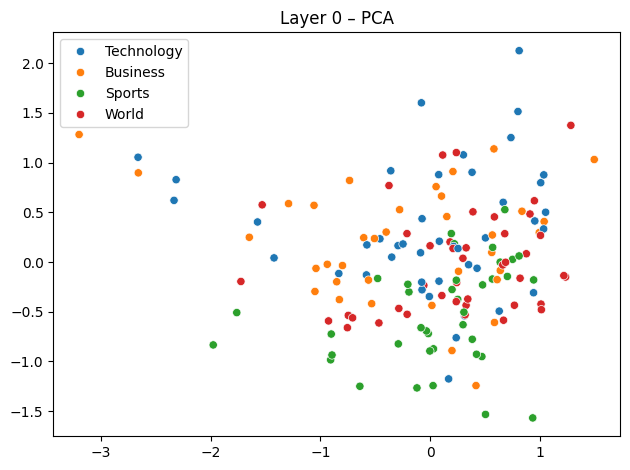

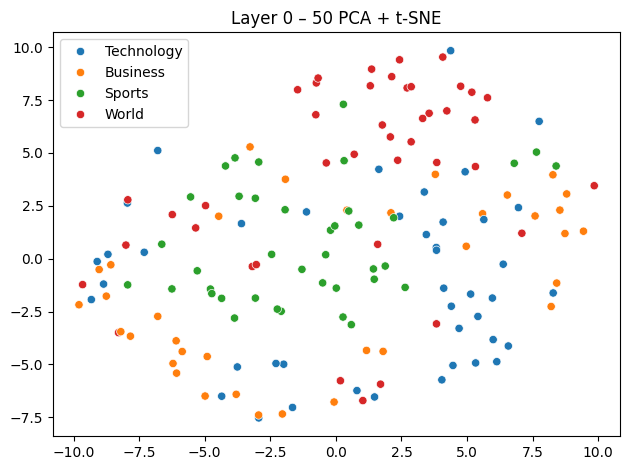

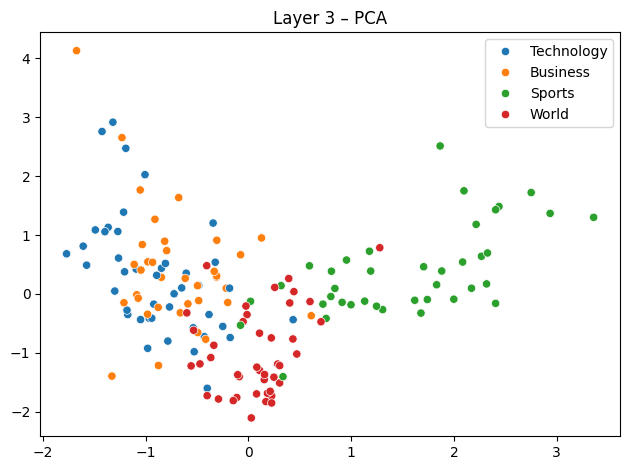

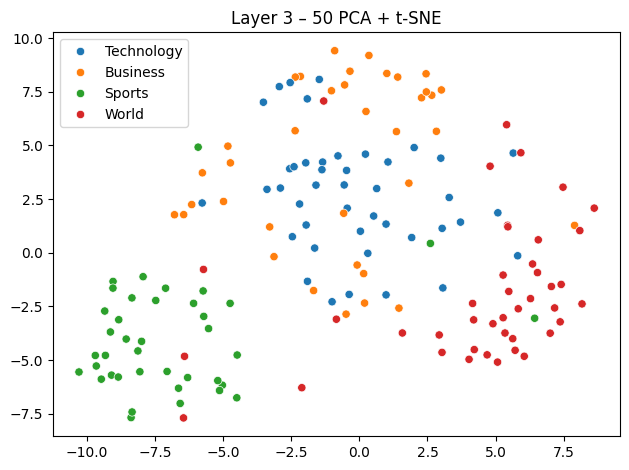

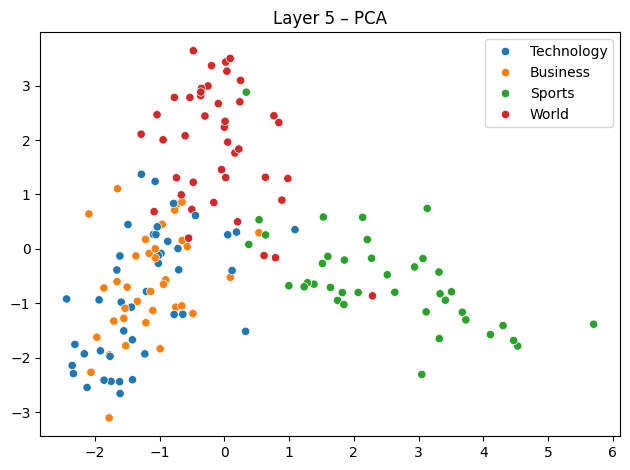

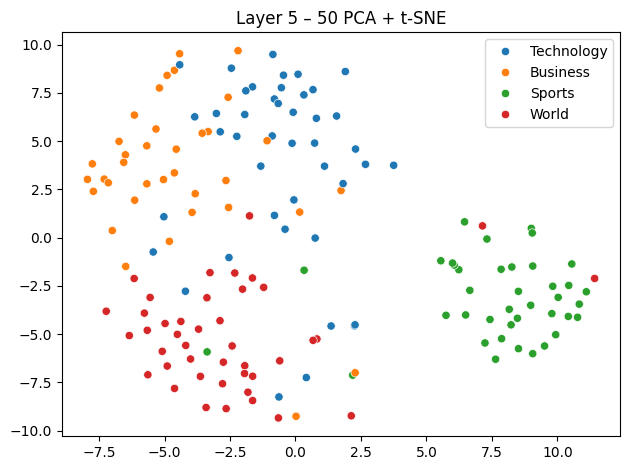

In [ ]:
# TODO: Load the pre-trained model
model_name = "distilbert-base-uncased"
config = AutoConfig.from_pretrained(params['model_name'], num_labels = params['num_classes'], output_hidden_states=True)
model  = AutoModelForSequenceClassification.from_pretrained(params['model_name'], config=config)

def get_embeddings(model, dataloader, max_batches=10, device="cuda"):

    model.eval().to(device)

    hidden_dict = defaultdict(list)
    labels_all  = []

    with torch.no_grad():
        for b, batch in enumerate(dataloader):
            if b >= max_batches:
                break

            input_ids      = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels         = batch["labels"].to(device)

            #forward: get hidden_states
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                output_hidden_states=True,
                return_dict=True
            )
            hidden_states = outputs.hidden_states

            #mean‑pooling over tokens axes (seq_len)
            mask = attention_mask.unsqueeze(-1)            # [B, seq, 1]
            lengths = mask.sum(dim=1).clamp(min=1)         # [B, 1]

            for layer_idx, h in enumerate(hidden_states):
                # h: [B, seq_len, hidden_dim]
                h = (h * mask).sum(dim=1) / lengths        # [B, hidden_dim]
                hidden_dict[layer_idx].append(h.cpu())     # guardamos no CPU

            labels_all.append(labels.cpu())

    #concatenates batches
    hidden_dict = {k: torch.cat(v, dim=0) for k, v in hidden_dict.items()}
    labels_all  = torch.cat(labels_all, dim=0)

    return hidden_dict, labels_all

def visualize_embeddings(hidden_states_dict, labels, layers_to_viz=[0, 3, 5], method='both', class_names=None, perplexity=30, pca_components=50, random_state=42):
    labels_np = labels.numpy()
    n_classes = len(np.unique(labels_np))
    cmap = plt.cm.get_cmap("tab10", n_classes)

    def reduce_and_plot(X, tag, layer):

        vectorized_class_translation = np.vectorize(lambda x: class_dict[x])

        sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = vectorized_class_translation(labels_np))
        plt.title(f"Layer {layer} – {tag}")
        plt.tight_layout()
        plt.show()

    for layer in layers_to_viz:
        X = hidden_states_dict[layer].numpy()

        #PCA
        if method in ("pca", "both"):
            X_pca = PCA(n_components=2, random_state=random_state).fit_transform(X)
            reduce_and_plot(X_pca, "PCA", layer)

        #t‑SNE
        if method in ("tsne", "both"):
            #first use PCA for efficiency
            if X.shape[1] > pca_components:
                X = PCA(n_components=pca_components,
                        random_state=random_state).fit_transform(X)
            X_tsne = TSNE(n_components=2,
                          perplexity=perplexity,
                          init="random",
                          random_state=random_state,
                          metric="cosine").fit_transform(X)
            reduce_and_plot(X_tsne, str(pca_components) + " PCA + t‑SNE", layer)

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
train = NewsDataset(train_df['full_text'], train_df['label'], tokenizer, params['max_length'])
train_loader = DataLoader(train, batch_size= 32, shuffle= True)

hidden_dict, y = get_embeddings(model, train_loader, max_batches=5, device = device)
visualize_embeddings(hidden_dict,
                     y,
                     layers_to_viz=[0, 3, 5],
                     method="both",
                     class_names=["classe A", "classe B", "classe C", "classe D"],
                     random_state= seed)

**Implementation Hints:**
- Use `output_hidden_states=True` when calling the model
- For visualization, focus on layers [0, 3, 5] to see progression
- Apply mean pooling across sequence dimension before PCA/t-SNE

---

## **Section 3: Fine-tuning and Training**

### **Learning Objectives**
- Implement transfer learning strategies (freezing/unfreezing layers)
- Set up training loop with proper metrics tracking
- Understand warmup scheduling and optimization techniques

### **Implementation Task**

Implement the fine-tuning process with proper parameter freezing and training loop.

In [ ]:
# TODO: Implement parameter freezing
# HINTS:
# 1. Freeze base model parameters: model.base_model.parameters()
# 2. Keep classifier parameters trainable: model.classifier.parameters()

for param in model.base_model.parameters():
    param.requires_grad = False

#print active parameters proportion
trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
total     = sum(p.numel() for p in model.parameters())
print(f"Treináveis: {trainable/1e6:.2f}M / {total/1e6:.2f}M parâmetros")

# TODO: Setup optimizer and scheduler
# optimizer = optim.AdamW(...)
# scheduler = get_linear_schedule_with_warmup(...)

#training parameters
lr          = params['learning_rate']
epochs      = params['epochs']
train_steps = len(train_loader) * epochs

optimizer = optim.AdamW(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=lr,
    weight_decay= params['weight_decay']
)

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * train_steps),     #10 % warm‑up
    num_training_steps=train_steps
)

accuracy_metric = Accuracy(task="multiclass", num_classes=4)

#loss criterion
criterion = nn.CrossEntropyLoss()

def train_epoch(model, dataloader, optimizer, scheduler, criterion, device, accuracy_metric):
    """Train for one epoch"""
    # TODO: Implement training loop
    # HINTS:
    # 1. Set model to train mode
    # 2. Iterate through dataloader with progress bar
    # 3. Forward pass, backward pass, optimizer step
    # 4. Update scheduler and metrics
    # 5. Return average loss and accuracy
    model.train()
    running_loss = 0.0
    accuracy_metric.to(device)
    accuracy_metric.reset()  # muito importante!

    for batch in tqdm(dataloader, desc="Treinando", leave=False):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids,
                        attention_mask=attention_mask,
                        labels=labels)

        loss = outputs.loss
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        running_loss += loss.item() * input_ids.size(0)
        accuracy_metric.update(preds, labels)

    avg_loss = running_loss / len(dataloader.dataset)
    acc = accuracy_metric.compute().item()
    return avg_loss, acc

@torch.no_grad()
def evaluate(model, dataloader, criterion, device, accuracy_metric):
    """Evaluate the model"""
    # TODO: Implement evaluation loop
    # HINTS:
    # 1. Set model to eval mode
    # 2. Use torch.no_grad()
    # 3. Collect predictions and labels
    # 4. Return loss, accuracy, predictions, labels
    model.eval()
    running_loss = 0.0
    accuracy_metric.to(device)
    accuracy_metric.reset()

    all_preds, all_labels = [], []

    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids,
                        attention_mask=attention_mask,
                        labels=labels)

        loss = outputs.loss
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        running_loss += loss.item() * input_ids.size(0)
        accuracy_metric.update(preds, labels)

        all_preds.append(preds.cpu())
        all_labels.append(labels.cpu())

    avg_loss = running_loss / len(dataloader.dataset)
    acc = accuracy_metric.compute().item()

    return avg_loss, acc, torch.cat(all_preds), torch.cat(all_labels)

# TODO: Implement main training loop
# for epoch in range(params['epochs']):
#     # Training and validation steps
#     # Store history for plotting
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

#training loop
validation = NewsDataset(validation_df['full_text'], validation_df['label'], tokenizer, params['max_length'])
val_loader = DataLoader(validation, batch_size= 32, shuffle= True)

history = {"train_loss": [], "train_acc": [],
           "val_loss": [],   "val_acc": []}

for epoch in range(1, epochs + 1):
    print(f"\nÉpoca {epoch}/{epochs}")
    train_loss, train_acc = train_epoch(
        model, train_loader, optimizer, scheduler, criterion, device,accuracy_metric
    )
    val_loss, val_acc, _, _ = evaluate(
        model, val_loader, criterion, device,accuracy_metric
    )

    history["train_loss"].append(train_loss)
    history["train_acc"].append(train_acc)
    history["val_loss"].append(val_loss)
    history["val_acc"].append(val_acc)

    print(f" Treino — loss: {train_loss:.4f} | acc: {train_acc:.4f}")
    print(f" Val   — loss: {val_loss:.4f} | acc: {val_acc:.4f}")


Treináveis: 0.59M / 66.96M parâmetros

Época 1/3


Treinando:   0%|          | 0/3375 [00:00<?, ?it/s]

 Treino — loss: 0.5856 | acc: 0.8256
 Val   — loss: 0.3340 | acc: 0.8865

Época 2/3


Treinando:   0%|          | 0/3375 [00:00<?, ?it/s]

 Treino — loss: 0.3297 | acc: 0.8874
 Val   — loss: 0.3097 | acc: 0.8912

Época 3/3


Treinando:   0%|          | 0/3375 [00:00<?, ?it/s]

 Treino — loss: 0.3174 | acc: 0.8905
 Val   — loss: 0.3036 | acc: 0.8938


**Key Implementation Points:**
- Use `torchmetrics` for metric computation
- Implement proper progress bars with `tqdm` (optional)
- Store training history for visualization

---

## **Section 4: Evaluation and Advanced Analysis**

### **Learning Objectives**
- Evaluate model performance with comprehensive metrics
- Visualize results through confusion matrices and plots
- Compare embeddings before and after fine-tuning
- Explore advanced fine-tuning strategies

### **Implementation Task**

Complete the evaluation pipeline and advanced analysis.

Histórico da loss/acurácia durante treinamento:


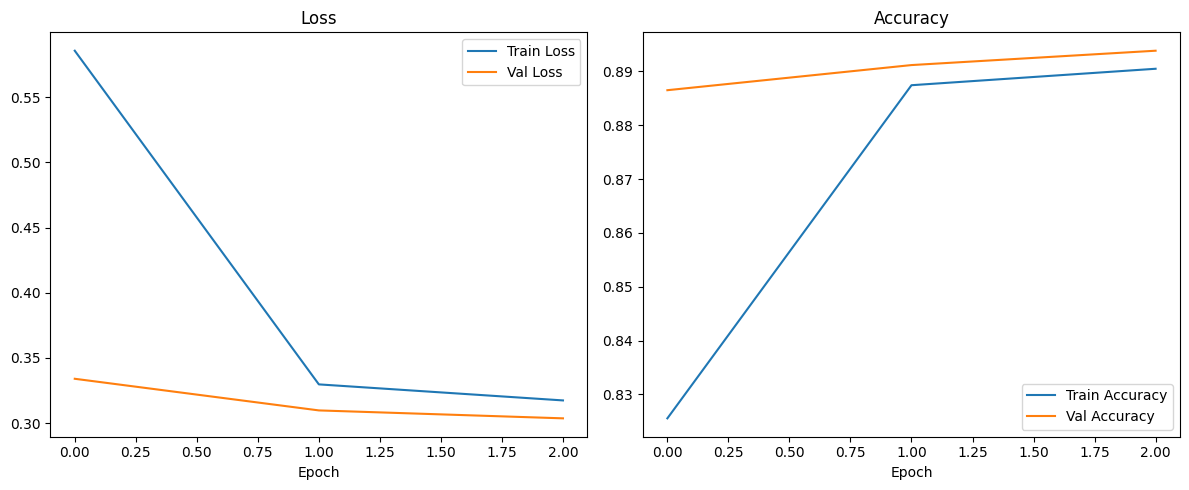


Test Loss: 0.3119 | Test Acc: 0.8936

Classification Report:

Class 'World':
  Precision: 0.8991
  Recall:    0.8868
  F1-Score:  0.8930

Class 'Sports':
  Precision: 0.9607
  Recall:    0.9768
  F1-Score:  0.9687

Class 'Business':
  Precision: 0.8529
  Recall:    0.8395
  F1-Score:  0.8462

Class 'Technology':
  Precision: 0.8602
  Recall:    0.8711
  F1-Score:  0.8656



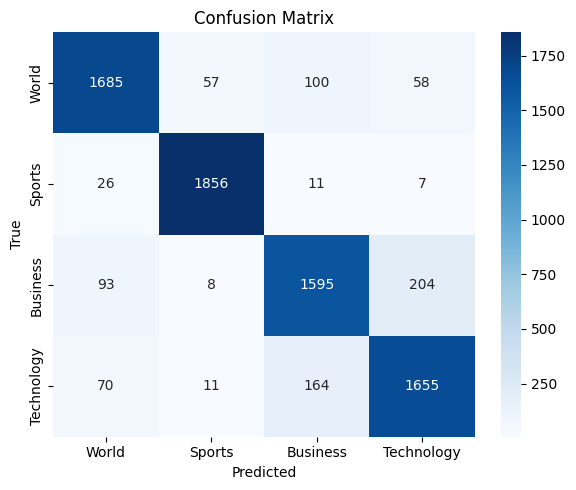

/tmp/ipython-input-6-3520241594.py:51: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



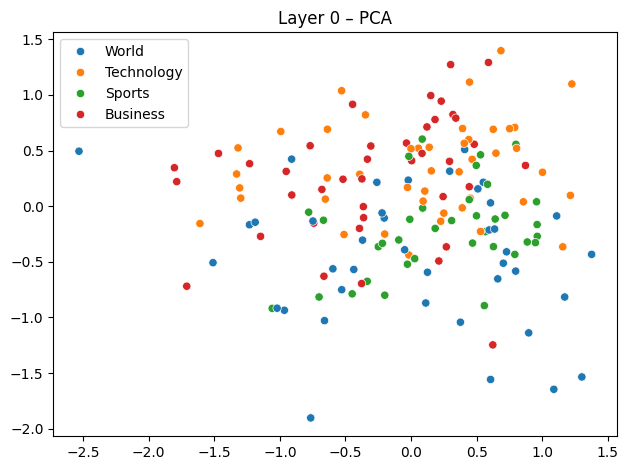

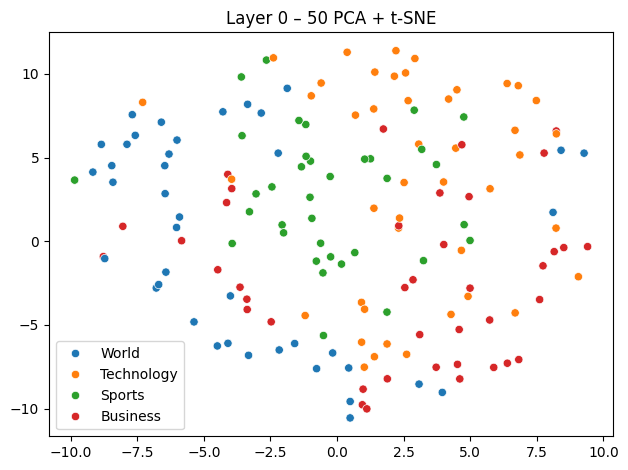

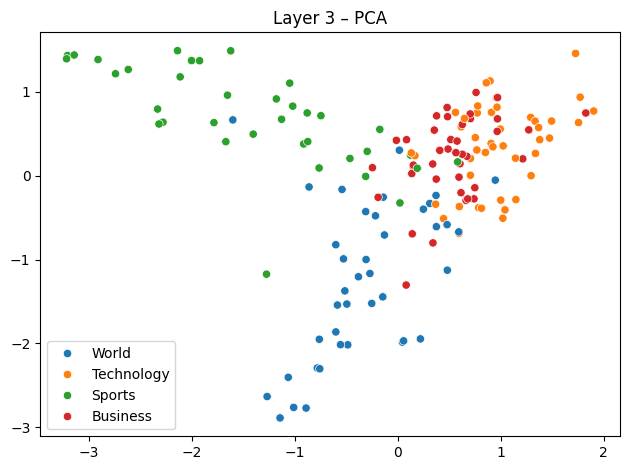

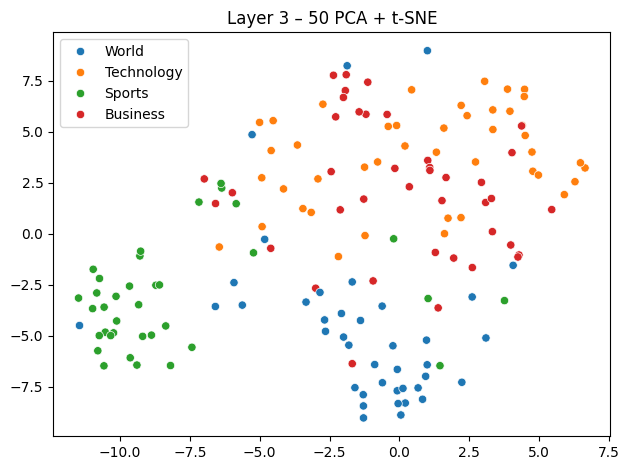

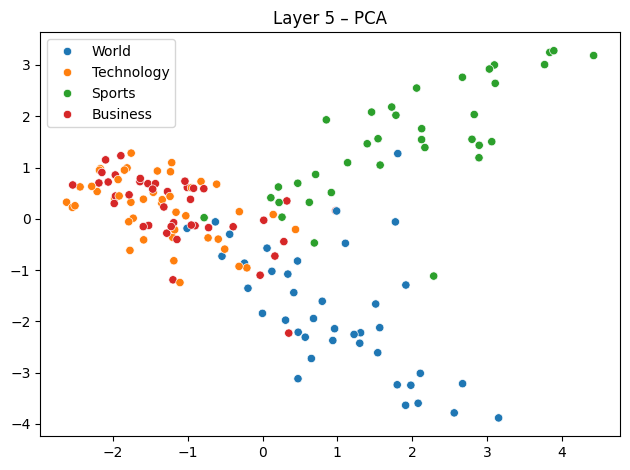

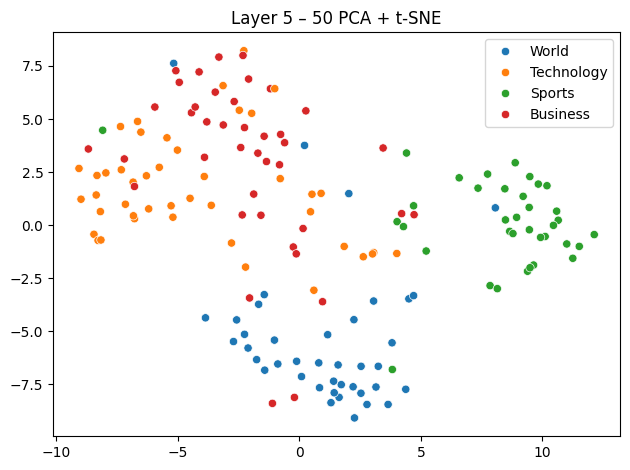

In [ ]:
# TODO: Comprehensive evaluation
# 1. Test set evaluation
# 2. Classification report with precision, recall, F1
# 3. Confusion matrix visualization
# 4. Training history plots

test = NewsDataset(test_df['full_text'], test_df['label'], tokenizer, params['max_length'])
test_loader = DataLoader(test, batch_size= 32, shuffle= True)

def plot_training_history(history):
    print("Histórico da loss/acurácia durante treinamento:")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()


def create_classification_report(predictions, labels, class_names):
    """Generate detailed classification report"""
    # TODO: Use torchmetrics to compute precision, recall, F1
    # Print formatted report
    print("\nClassification Report:\n")
    num_classes = len(class_names)

    precision = MulticlassPrecision(num_classes=num_classes, average=None)
    recall    = MulticlassRecall(num_classes=num_classes, average=None)
    f1        = MulticlassF1Score(num_classes=num_classes, average=None)

    # calculando métricas
    precision_score = precision(preds, labels)
    recall_score    = recall(preds, labels)
    f1_score        = f1(preds, labels)

    # printando
    for i, name in enumerate(class_names):
        print(f"Class '{name}':")
        print(f"  Precision: {precision_score[i]:.4f}")
        print(f"  Recall:    {recall_score[i]:.4f}")
        print(f"  F1-Score:  {f1_score[i]:.4f}\n")

def plot_confusion_matrix(preds, labels, class_names):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

#ploting trainiing history
plot_training_history(history)

#test set evaluation
test_loss, test_acc, preds, labels = evaluate(
    model, test_loader, criterion, device, accuracy_metric
)
print(f"\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

#report status
create_classification_report(preds, labels, class_dict.values())

#confusion matrix plot
plot_confusion_matrix(preds, labels, class_dict.values())

# Post-fine-tuning embedding comparison
# TODO: Extract embeddings after fine-tuning
# TODO: Compare with pre-fine-tuning embeddings

hidden_dict, y = get_embeddings(model, train_loader, max_batches=5)
visualize_embeddings(hidden_dict,
                     y,
                     layers_to_viz=[0, 3, 5],
                     method="both",
                     class_names=["classe A", "classe B", "classe C", "classe D"],
                     random_state= seed)

### **Advanced Experiments (Bonus)**

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Treinando com learning rate = 1e-05
Treináveis: 0.59M / 66.96M parâmetros


Treinando:   0%|          | 0/3375 [00:00<?, ?it/s]

Treinando:   0%|          | 0/3375 [00:00<?, ?it/s]

Treinando:   0%|          | 0/3375 [00:00<?, ?it/s]

Histórico da loss/acurácia durante treinamento:


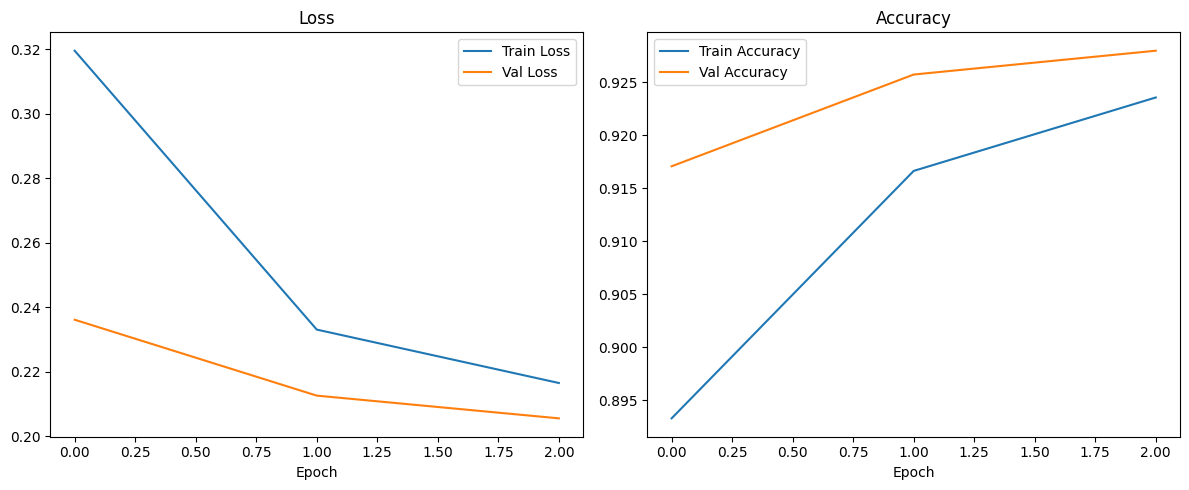


Test Loss: 0.2193 | Test Acc: 0.9212

Classification Report:

Class 'World':
  Precision: 0.9376
  Recall:    0.9179
  F1-Score:  0.9277

Class 'Sports':
  Precision: 0.9734
  Recall:    0.9832
  F1-Score:  0.9783

Class 'Business':
  Precision: 0.8921
  Recall:    0.8747
  F1-Score:  0.8833

Class 'Technology':
  Precision: 0.8820
  Recall:    0.9089
  F1-Score:  0.8953



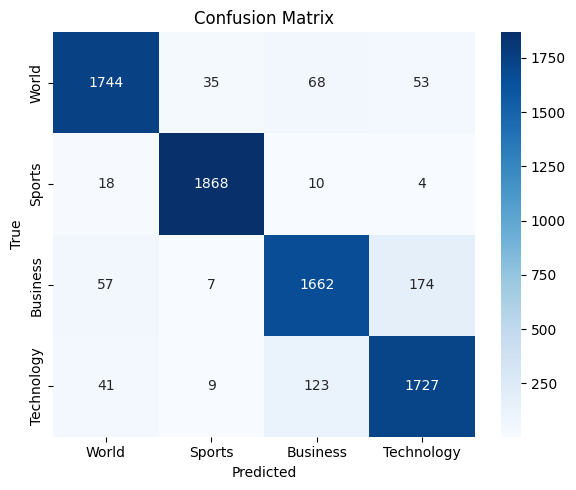


Treinando com learning rate = 5e-05


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Treináveis: 0.59M / 66.96M parâmetros


Treinando:   0%|          | 0/3375 [00:00<?, ?it/s]

Treinando:   0%|          | 0/3375 [00:00<?, ?it/s]

Treinando:   0%|          | 0/3375 [00:00<?, ?it/s]

Histórico da loss/acurácia durante treinamento:


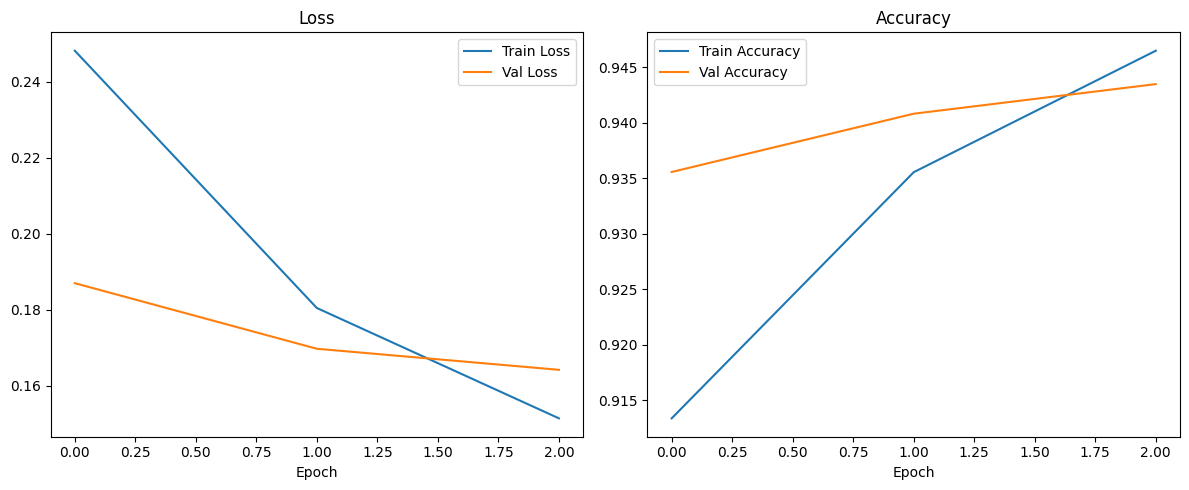


Test Loss: 0.1778 | Test Acc: 0.9392

Classification Report:

Class 'World':
  Precision: 0.9574
  Recall:    0.9458
  F1-Score:  0.9515

Class 'Sports':
  Precision: 0.9796
  Recall:    0.9863
  F1-Score:  0.9830

Class 'Business':
  Precision: 0.9136
  Recall:    0.9021
  F1-Score:  0.9078

Class 'Technology':
  Precision: 0.9064
  Recall:    0.9226
  F1-Score:  0.9144



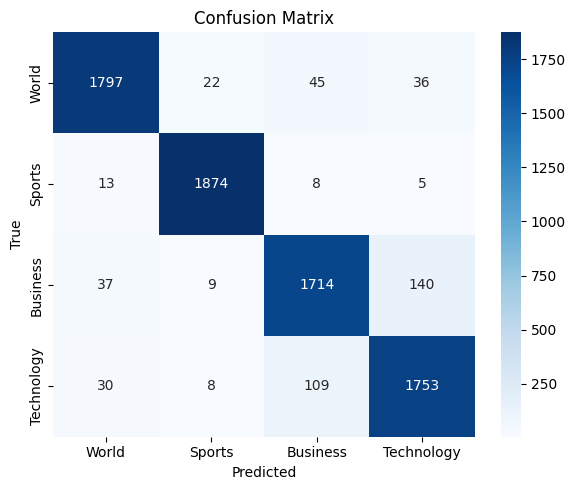


Treinando com learning rate = 0.0001


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Treináveis: 0.59M / 66.96M parâmetros


Treinando:   0%|          | 0/3375 [00:00<?, ?it/s]

Treinando:   0%|          | 0/3375 [00:00<?, ?it/s]

Treinando:   0%|          | 0/3375 [00:00<?, ?it/s]

Histórico da loss/acurácia durante treinamento:


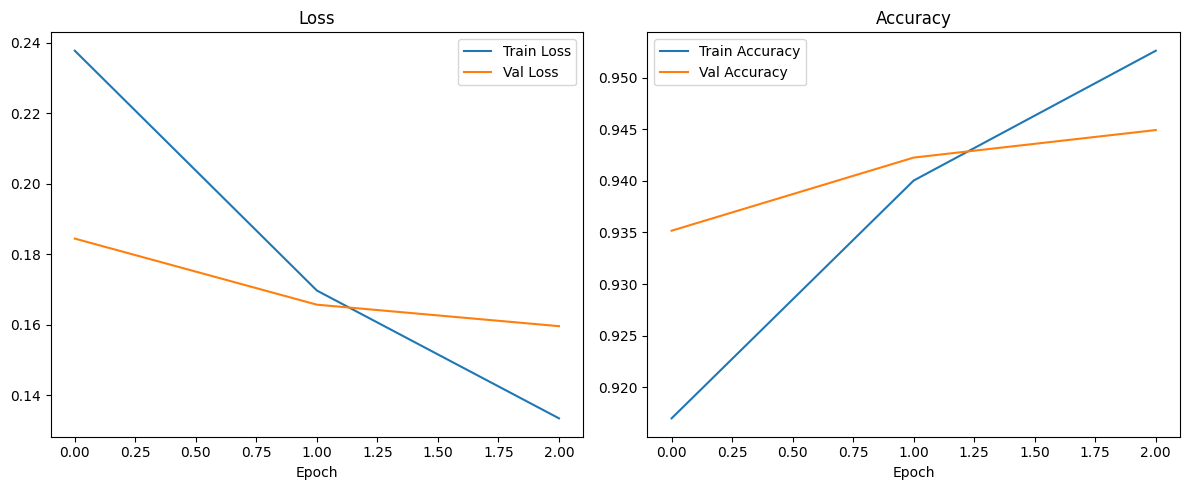


Test Loss: 0.1718 | Test Acc: 0.9413

Classification Report:

Class 'World':
  Precision: 0.9630
  Recall:    0.9458
  F1-Score:  0.9543

Class 'Sports':
  Precision: 0.9848
  Recall:    0.9879
  F1-Score:  0.9863

Class 'Business':
  Precision: 0.9140
  Recall:    0.9063
  F1-Score:  0.9101

Class 'Technology':
  Precision: 0.9043
  Recall:    0.9253
  F1-Score:  0.9147



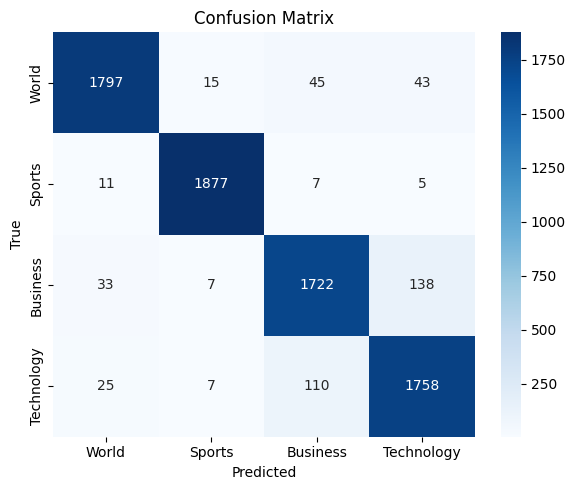

In [ ]:
# Experiment 1: Unfreeze more layers
# TODO: Unfreeze last transformer layer
# Compare performance improvement

def unfreeze_last_transformer_layer(model):
    # freeze all layers
    for param in model.distilbert.parameters():
        param.requires_grad = False

    #unfreeze the last one
    last_layer = model.distilbert.transformer.layer[-1]
    for param in last_layer.parameters():
        param.requires_grad = True

    #unfreeze classifier
    for param in model.classifier.parameters():
        param.requires_grad = True


# Experiment 2: Learning rate analysis
# TODO: Test different learning rates [1e-5, 2e-5, 5e-5, 1e-4]

learning_rates = [1e-5, 5e-5, 1e-4]

for lr in learning_rates:
    print(f"\nTreinando com learning rate = {lr}")

    # Resetar modelo (recarregar do zero)
    model_expiriment = AutoModelForSequenceClassification.from_pretrained(model_name, config=config)
    model_expiriment.to(device)

    # Unfreeze
    unfreeze_last_transformer_layer(model_expiriment)
    # print active parameters
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total     = sum(p.numel() for p in model.parameters())
    print(f"Treináveis: {trainable/1e6:.2f}M / {total/1e6:.2f}M parâmetros")

    optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model_expiriment.parameters()), lr=lr, weight_decay= params['weight_decay'])
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0,
                                                num_training_steps=len(train_loader) * epochs)

    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model_expiriment, train_loader, optimizer, scheduler, criterion, device, accuracy_metric)
        val_loss, val_acc, _, _ = evaluate(model_expiriment, val_loader, criterion, device, accuracy_metric)

        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

    #plot reults
    plot_training_history(history)

    #test set evaluation
    test_loss, test_acc, preds, labels = evaluate(
        model_expiriment, test_loader, criterion, device, accuracy_metric
    )
    print(f"\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

    #report status
    create_classification_report(preds, labels, class_dict.values())

    #confusion matrix plot
    plot_confusion_matrix(preds, labels, class_dict.values())

# Experiment 3: Architecture analysis
# TODO: Analyze parameter distribution across layers

The best learning rate was 0.0001

---

## **Discussion Questions**

### **Theoretical Understanding**

1. **What is the attention mechanism in transformers and why is it important?**

Attention mechanism permite ao modelo focar nas partes mais relevantes da entrada ao processar cada token. É essencial nos transformers pois substitui estruturas sequenciais como RNNs, permitindo paralelismo e capturando dependências globais.

2. **Explain the difference between self-attention and cross-attention.**

Self-attention calcula a atenção entre tokens da mesma sequência (ex: entrada), enquanto cross-attention calcula a atenção entre duas sequências diferentes (ex: decodificador olhando para a saída do codificador).

3. **What are the advantages of using pre-trained models like DistilBERT over training from scratch?**

Evita custo computacional de treinar do zero, já aprendeu representações linguísticas ricas, provinda de grandes bancos de dados. Portanto melhora desempenho com menos dados e recursos.

4. **Why do we freeze most parameters during initial fine-tuning?**

Congelamos parâmetros para evitar sobreajuste, reduzir custo de treino e preservar o conhecimento geral do modelo, ajustando apenas as camadas finais para a tarefa específica; não congelar os parâmetros pode resultar também em esquecimento catastrófico, inutilizando todo o processo de pré-treinamento.

5. **What is the purpose of the warmup phase in learning rate scheduling?**

Warmup permite que o otimizador comece com uma taxa de aprendizado pequena e aumente gradualmente, estabilizando o treino e evitando oscilações iniciais.

### **Implementation Analysis**

6. **How does the embedding visualization change before and after fine-tuning? What does this tell us?**

Após o fine tunning a separação dos pontos em cluster ficou mais clara quando em comparação com o "original" que tinham pontos mais homogeneamente dispersos

7. **Compare the computational requirements of fine-tuning vs. training from scratch.**

Treinar from scratch requer uma quantidade massiva de dados e custo computacional excessivo para atingir resultados minimamente satisfatórios, para isso utilizamos o fine tunning de modelos já prontos que nos permitem alcançar alta precisão com modelos já pré treinados e adaptando-os para tarefas específicas

8. **What would happen if we used a longer sequence length? Discuss trade-offs.**

Atualmente utilizamos n = 128

O trade off envolvido é o comumente avaliado em modelos de machine learning, aumentar poderia resultar em análise de estruturas gramaticais mais complexas ao custo de um aumento custo computacional quadrático, existe também a possibilidade do método não se ajustar bem devido a truncamentos e paddings excessivos em textos/frases curtas

9. **Why is DistilBERT faster than BERT? What are the trade-offs?**

O principal fator é relacionado a arquitetura das redes, distilbert tem 6 camadas a menos (bert tem 12), distilbert não carrega o embedding de posição absoluto presente no BERT, e também falta no token [token_type_ids], porém a avaliação indica que apesar destas economias feitas no modelo distilbert alcança acurácia de 97% apresentada por BERT

10. **How would you adapt this code for a different text classification task?**

Alterando a tabela de entrada:

A coluna de texto (ou a forma de compor full_text).

O número de classes (params['num_classes']).

(Opcional) O tamanho do max_length e nome do modelo (model_name).

### **Performance Analysis**

11. **Analyze your confusion matrix. Which classes are most often confused and why?**

Bussines e Tecnology, muito provavelmente pelos jargões mais formais e tópicos relacionados presentes em ambos os textos, porém devido a estrututura dos transformers e redes é impossível saber com precisão, este é apenas um "educated guess"

12. **What factors contribute to the model's performance on this dataset?**

Modelo conhecido de boa performance pré treinado, destilado do BERT, as boas práticas com o manuseio de dados, dados separáveis e bem distribuídos (aprox 2000 por categoria)

13. **How would you improve the model's performance further?**

Aumentar tamanho da rede é sempre a aproximação mais "straight forward" que se deve analisar caso possível

Rodar mais epochs

Aumentar max_length

Análisar a existência de outros modelos próprios para esta tarefa

14. **Compare the F1-scores across different classes. What might cause the differences?**

Sports tendo o maior f1 muito provavelvente seu dicionário lexico sendo de palavras exclusivas para este tipo de texto, (eg. "jogos","gols","campeonato")
Businees e tech tendo menores f1 devido o que foi discutido anteriormente

15. **What additional preprocessing steps could improve performance?**

Avaliar os dados, talvez limpar tokens desnecessários, corrigir erros ortográficos, remover ruidos textuais como anuncios e URLs e explorar data augmentation

---

## **Submission Requirements**

1. **Complete Jupyter notebook** with all implementations
2. **Dataset exploration report** with visualizations
3. **Answers to discussion questions**
4. **Performance analysis** including:
   - Training curves
   - Confusion matrix
   - Classification report
   - Embedding visualizations (before/after fine-tuning)

---
## **Grading Criteria**

- **Implementation (40%)**: Correct and complete code implementation
- **Dataset Exploration & Visualization (20%)**: Thorough analysis with meaningful plots
- **Performance Analysis (20%)**: Proper evaluation and interpretation of results  
- **Discussion Questions (20%)**: Thoughtful and accurate responses

---

### **Tips for Success**

1. **Start early** - Transformer training can take time. Also keep in mind the utilization of GPU in Colab environment (or your local setup)
2. **Document your code** - Add comments explaining key steps
3. **Experiment** - Try different hyperparameters and visualize results
4. **Analyze failures** - Look at misclassified examples to understand limitations
5. **Compare approaches** - Try different freezing strategies and compare results

---

#### **Deadline**

Sunday, Jun 29, 11:59 pm.

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- Jun 30, 11:59 pm : grade * 0.75
- Jul 01, 11:59 pm : grade * 0.5
- Jul 02, 11:59 pm : grade * 0.25

---

#### **Submission**

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English) or Google Colaboratory link (remember to share it!).

**This activity is NOT individual, it must be done in pairs (two-person group).**

Only one individual should deliver the notebook.

---

#### **REFERENCES**

Zhang, X., Zhao, J., & LeCun, Y. (2015). Character-level convolutional networks for text classification. Advances in neural information processing systems, 28.
https://doi.org/10.48550/arXiv.1509.01626.

Anand, A. (2018). AG News Classification Dataset [Data set]. Kaggle. https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

Gulli, A. (n.d.). AG's corpus of news articles. http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html